# Character Recognition using an Artificial Neural Network (Inspired by Nielsen)


## 1. Setup and Importing Libraries


In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout # Dropout is optional but good practice
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Optional: Print versions for reproducibility
print(f"TensorFlow Version: {tf.__version__}")
print(f"Keras Version: {keras.__version__}")
print(f"NumPy Version: {np.__version__}")

TensorFlow Version: 2.18.0
Keras Version: 3.8.0
NumPy Version: 2.0.2


## 2. Load and Explore the MNIST Dataset


In [2]:
# Load the dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Print the shapes of the data arrays
print("--- Dataset Shapes ---")
print(f"Training data (images) shape: {x_train.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Test data (images) shape: {x_test.shape}")
print(f"Test labels shape: {y_test.shape}")

# Print data types
print("\n--- Data Types ---")
print(f"Training data type: {x_train.dtype}")
print(f"Training labels type: {y_train.dtype}")

# Print min/max pixel values
print("\n--- Pixel Value Range ---")
print(f"Min pixel value: {np.min(x_train)}")
print(f"Max pixel value: {np.max(x_train)}")

# Print unique labels
print("\n--- Unique Labels ---")
print(f"Unique labels in training set: {np.unique(y_train)}")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
--- Dataset Shapes ---
Training data (images) shape: (60000, 28, 28)
Training labels shape: (60000,)
Test data (images) shape: (10000, 28, 28)
Test labels shape: (10000,)

--- Data Types ---
Training data type: uint8
Training labels type: uint8

--- Pixel Value Range ---
Min pixel value: 0
Max pixel value: 255

--- Unique Labels ---
Unique labels in training set: [0 1 2 3 4 5 6 7 8 9]


## 3. Data Preprocessing


In [4]:
# Store original test labels for later evaluation comparison
y_test_original = y_test

# --- Normalization ---
# Convert data type to float32 for division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Scale pixel values to the range [0, 1]
x_train /= 255.0
x_test /= 255.0

print("--- Pixel Values After Normalization ---")
print(f"Min pixel value (train): {np.min(x_train)}")
print(f"Max pixel value (train): {np.max(x_train)}")

# --- Reshaping ---
# Flatten the images from (num_samples, 28, 28) to (num_samples, 784)
# We can use Keras' Flatten layer instead of doing this manually, which is often preferred.
# However, for clarity, we can show the manual reshape:
# image_vector_size = 28 * 28
# x_train_flat = x_train.reshape(x_train.shape[0], image_vector_size)
# x_test_flat = x_test.reshape(x_test.shape[0], image_vector_size)
# print(f"\n--- Shape After Flattening ---")
# print(f"Training data shape: {x_train_flat.shape}")
# print(f"Test data shape: {x_test_flat.shape}")
# If using Flatten layer, original shapes (num_samples, 28, 28) are kept until the layer.

# --- One-Hot Encode Labels ---
num_classes = 10 # Digits 0-9
y_train_cat = to_categorical(y_train, num_classes)
y_test_cat = to_categorical(y_test, num_classes)

print("\n--- Label Encoding Example ---")
print(f"Original label (first train sample): {y_train[0]}")
print(f"One-hot encoded label (first train sample): {y_train_cat[0]}")
print(f"Shape of one-hot encoded training labels: {y_train_cat.shape}")
print(f"Shape of one-hot encoded test labels: {y_test_cat.shape}")

--- Pixel Values After Normalization ---
Min pixel value (train): 0.0
Max pixel value (train): 1.0

--- Label Encoding Example ---
Original label (first train sample): 5
One-hot encoded label (first train sample): [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
Shape of one-hot encoded training labels: (60000, 10)
Shape of one-hot encoded test labels: (10000, 10)


## 4. Build the Neural Network Model

We will build a simple feedforward neural network using the Keras Sequential API. Our network will have:

1.  **Flatten Layer:** This layer takes the 28x28 image input and flattens it into a 784-element vector. It doesn't have any learnable parameters.
2.  **Hidden Layer(s):** One or more Dense (fully connected) layers. These are the core processing layers. Each neuron receives input from all neurons in the previous layer. We'll use the ReLU (Rectified Linear Unit) activation function ($f(x) = max(0, x)$), which is common and effective for hidden layers.
3.  **Output Layer:** A Dense layer with 10 neurons (one for each digit class). It uses the **Softmax** activation function. Softmax converts the layer's raw output scores (logits) into probabilities, ensuring they sum to 1. The neuron with the highest probability indicates the predicted class.

This structure is similar to the networks described by Nielsen, consisting of layers of interconnected neurons where information flows forward.

In [5]:
# Define model constants
input_shape = (28, 28) # Input shape before flattening
hidden_units_1 = 128  # Number of neurons in the first hidden layer
# hidden_units_2 = 64   # Optional: Add another hidden layer
output_units = num_classes # 10 for MNIST digits

# Build the Sequential model
model = Sequential(name="Simple_ANN_MNIST")

# Input Layer: Flatten the 28x28 image
model.add(Flatten(input_shape=input_shape, name="Input_Flatten"))

# Hidden Layer 1: Dense layer with ReLU activation
model.add(Dense(hidden_units_1, activation='relu', name="Hidden_Layer_1"))
# Optional: Add Dropout for regularization
# model.add(Dropout(0.25)) # Dropout randomly sets a fraction of input units to 0 at each update during training

# Optional: Hidden Layer 2
# model.add(Dense(hidden_units_2, activation='relu', name="Hidden_Layer_2"))
# model.add(Dropout(0.25))

# Output Layer: Dense layer with Softmax activation for classification
model.add(Dense(output_units, activation='softmax', name="Output_Layer"))

# Print the model summary
print("--- Model Summary ---")
model.summary()

--- Model Summary ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "Simple_ANN_MNIST"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input_Flatten (Flatten)         │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden_Layer_1 (Dense)          │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_Layer (Dense)            │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

**Understanding the Summary:**

## 5. Compile the Model


In [6]:
# Compile the model
model.compile(optimizer='adam', # Or try 'sgd'
              loss='categorical_crossentropy',
              metrics=['accuracy'])

print("Model compiled successfully.")

Model compiled successfully.


## 6. Train the Model


In [7]:
# Define training parameters
batch_size = 128
epochs = 20 # Increase epochs for potentially better results, but watch for overfitting
validation_split = 0.2 # Use 20% of training data for validation

# Optional: Define Early Stopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=3,          # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True, # Restore model weights from the epoch with the best value of the monitored quantity
    verbose=1
)

print("--- Starting Training ---")
# Train the model
history = model.fit(x_train, y_train_cat,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1, # Set to 1 to show progress bar, 2 for one line per epoch, 0 for silent
                    validation_split=validation_split,
                    callbacks=[early_stopping] # Add callbacks here
                   )

print("--- Training Finished ---")

--- Starting Training ---
Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8118 - loss: 0.6745 - val_accuracy: 0.9404 - val_loss: 0.2098
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9419 - loss: 0.1996 - val_accuracy: 0.9541 - val_loss: 0.1635
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9600 - loss: 0.1405 - val_accuracy: 0.9606 - val_loss: 0.1339
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9685 - loss: 0.1074 - val_accuracy: 0.9657 - val_loss: 0.1177
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9764 - loss: 0.0855 - val_accuracy: 0.9692 - val_loss: 0.1079
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9795 - loss: 0.0711 - val_accuracy: 0.9703 - val_loss: 0.1031
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9829 - loss: 0.0604 - val_accuracy: 0.9701 - val_loss: 0.0950
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9857 - loss:

## 7. Evaluate the Model


In [8]:
# Evaluate the model on the test set
score = model.evaluate(x_test, y_test_cat, verbose=0)

print("--- Test Set Evaluation ---")
print(f"Test loss: {score[0]:.4f}")
print(f"Test accuracy: {score[1]:.4f} ({score[1]*100:.2f}%)")

--- Test Set Evaluation ---
Test loss: 0.0805
Test accuracy: 0.9766 (97.66%)


### Visualize Training History


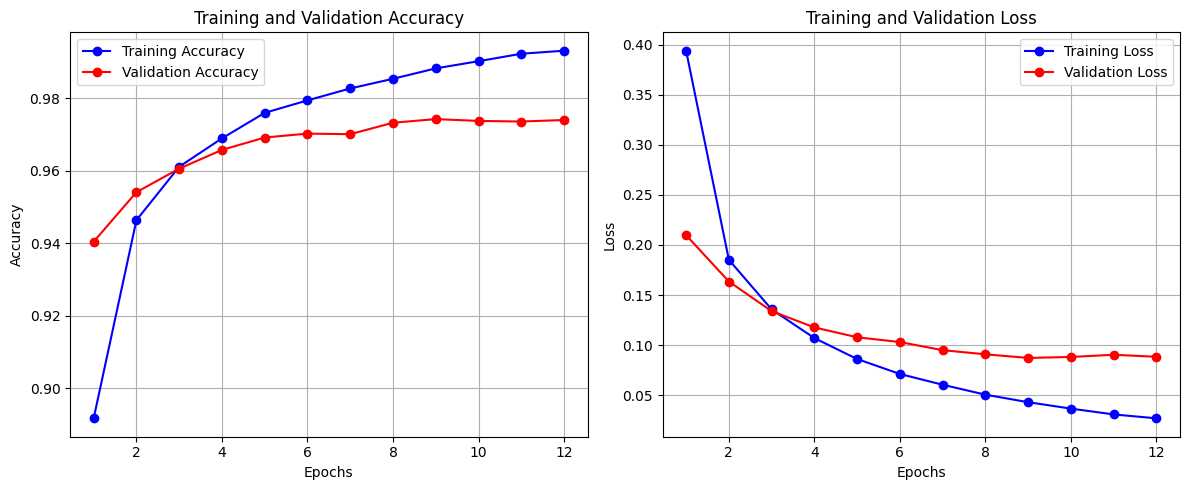

In [9]:
# Get training history data
history_dict = history.history
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

# Determine the number of epochs actually run (could be less than defined due to early stopping)
epochs_range = range(1, len(acc) + 1)

# Plot Training and Validation Accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, 'bo-', label='Training Accuracy')
plt.plot(epochs_range, val_acc, 'ro-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot Training and Validation Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, 'bo-', label='Training Loss')
plt.plot(epochs_range, val_loss, 'ro-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

## 8. Make Predictions



313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


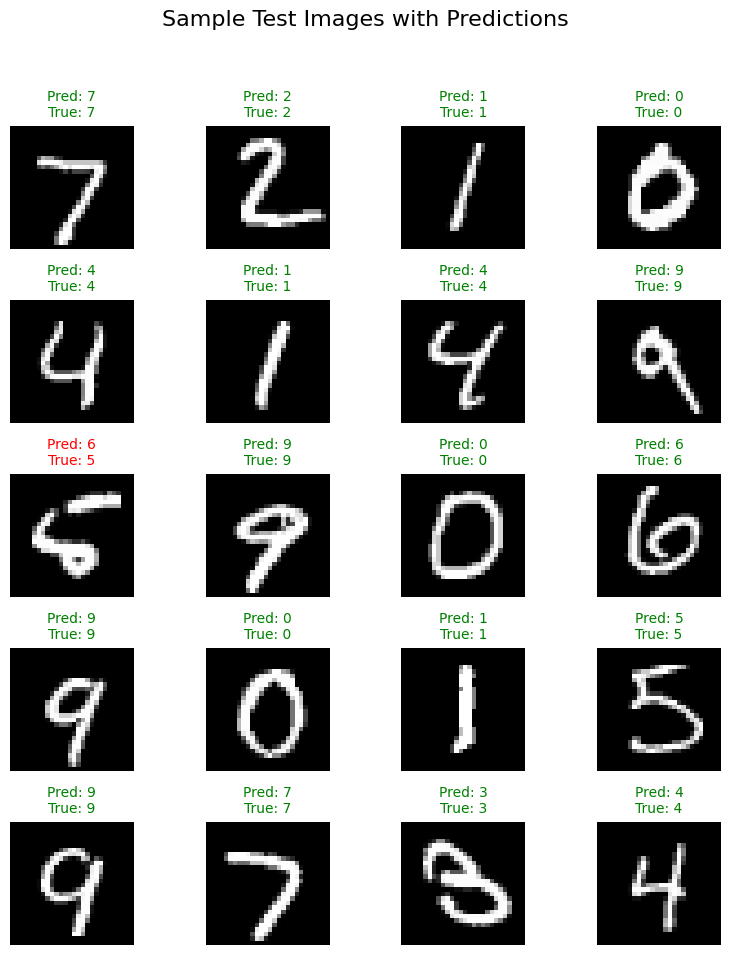

In [10]:
# Get predictions for the entire test set
predictions_probs = model.predict(x_test)

# Convert probabilities to class labels (index of the max probability)
predictions_labels = np.argmax(predictions_probs, axis=1)

# Display some test images with their predicted and true labels
num_rows = 5
num_cols = 4
num_images = num_rows * num_cols

plt.figure(figsize=(2 * num_cols, 2 * num_rows))
plt.suptitle('Sample Test Images with Predictions', fontsize=16)
for i in range(num_images):
    plt.subplot(num_rows, num_cols, i + 1)
    # Use the original x_test (before normalization) for display if desired, or reshaped normalized
    # Here we use the normalized, reshaped back to 28x28
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray') # Reshape back to 28x28 for display
    plt.axis('off')
    predicted_label = predictions_labels[i]
    true_label = y_test_original[i] # Use the original numeric label

    color = 'green' if predicted_label == true_label else 'red'
    plt.title(f"Pred: {predicted_label}\nTrue: {true_label}", color=color, fontsize=10)

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent title overlap
plt.show()

### Confusion Matrix


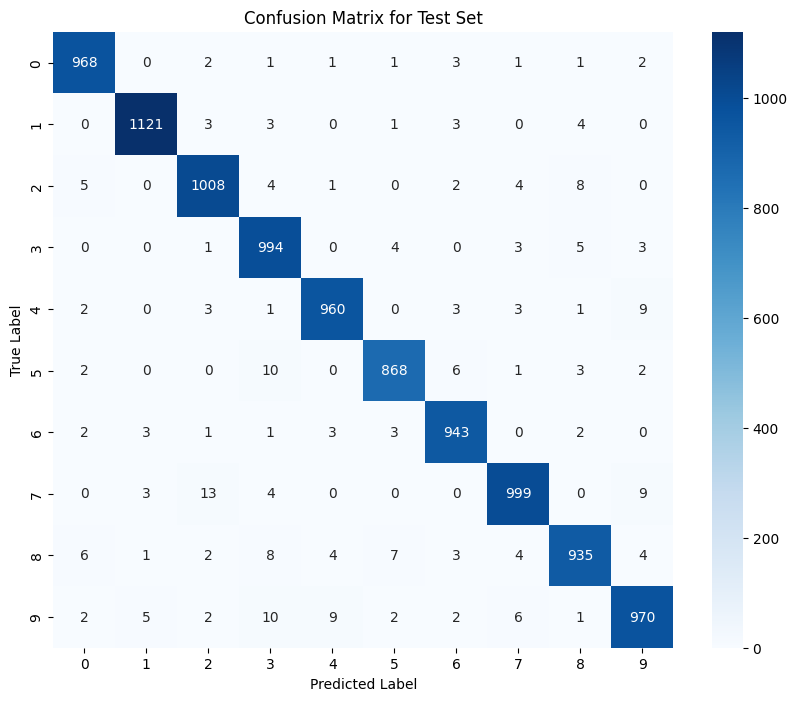


--- Classification Report ---
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.98      0.98      1032
           3       0.96      0.98      0.97      1010
           4       0.98      0.98      0.98       982
           5       0.98      0.97      0.98       892
           6       0.98      0.98      0.98       958
           7       0.98      0.97      0.98      1028
           8       0.97      0.96      0.97       974
           9       0.97      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [11]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test_original, predictions_labels)

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=range(num_classes), yticklabels=range(num_classes))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Test Set')
plt.show()

# Print classification report (precision, recall, f1-score)
print("\n--- Classification Report ---")
print(classification_report(y_test_original, predictions_labels, target_names=[str(i) for i in range(num_classes)]))

## 9. Conclusion and Further Steps


In [13]:
# Example: Saving the model
try:
    model.save('mnist_ann_model.h5')
    print("\nModel saved successfully as mnist_ann_model.h5")

    # Example: Loading the model
    # loaded_model = keras.models.load_model('mnist_ann_model.h5')
    # print("Model loaded successfully.")
    # Verify loaded model performance
    # loaded_score = loaded_model.evaluate(x_test, y_test_cat, verbose=0)
    # print(f"Loaded Model Test Accuracy: {loaded_score[1]:.4f}")
except Exception as e:
    print(f"\nError saving model: {e}")
    print("Ensure you have h5py installed ('pip install h5py')")


Model saved successfully as mnist_ann_model.h5
